In [1]:
import random
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

In [2]:
#Create type for maximization of the function
creator.create("FitnessMax",base.Fitness,weights=(1.0,))

#Create type for store individual (in this example we use list)
creator.create("Individual", list, fitness=creator.FitnessMax)

In [3]:
#Function for randomly selected items
def randBool():
    return random.random()>0.5

In [4]:
# The items number (that means – the size of the problem)
NUMBER_OF_ITEMS = 50
# The max weight of the items in the bag (the max number of the items depend on the MAX_WEIGHT)
MAX_WEIGHT = 30

# Description of the problem
# the code below may be replaced with loading the problem from the file)
items = {}
for i in range(NUMBER_OF_ITEMS):
    items[i] = (random.randint(1,10),random.uniform(0,100))
print(items)

{0: (6, 71.62361632441227), 1: (6, 64.0708838471869), 2: (5, 11.39146141851084), 3: (8, 54.95228190354047), 4: (10, 98.65358717401189), 5: (5, 29.331247616058697), 6: (3, 37.10111859590503), 7: (2, 16.972119405975704), 8: (4, 62.785308608311716), 9: (8, 2.428696371213712), 10: (5, 94.8144033086595), 11: (6, 4.247575829058226), 12: (1, 78.14751005156218), 13: (2, 0.747662152472961), 14: (7, 80.94589089878161), 15: (4, 80.13222576919604), 16: (4, 77.23472228888258), 17: (8, 46.763984036029406), 18: (10, 36.44216087108315), 19: (6, 30.24641917872207), 20: (3, 42.377288255014335), 21: (3, 21.141474897761768), 22: (2, 9.026902410207537), 23: (3, 84.06000104704792), 24: (3, 26.176419653222993), 25: (4, 66.11069744330115), 26: (2, 91.98995912136628), 27: (2, 11.793588371628317), 28: (1, 95.35092228258225), 29: (1, 88.89319258507736), 30: (3, 28.108403618779377), 31: (8, 23.042626052594706), 32: (5, 42.6857800008704), 33: (7, 12.51764532843611), 34: (8, 9.851863990810372), 35: (6, 15.095898529

In [5]:
#Create toolbox for register needed functions
toolbox = base.Toolbox()
#Register function used for init content of the individual (for the benchmark function are the real values)
toolbox.register("attribute_bool",randBool)

#Register function used for init Population of the individuals
toolbox.register("individual", tools.initRepeat,
creator.Individual, toolbox.attribute_bool, n= NUMBER_OF_ITEMS)

#Register function for create population of individuals
toolbox.register("population",tools.initRepeat, list,
toolbox.individual)

In [6]:
#Testing the registered function (look on the content of the individual)
ind1 = toolbox.individual()

In [7]:
pop = toolbox.population(n=50)
print(pop)

[[False, False, True, True, True, True, False, True, False, True, True, True, False, True, True, False, True, True, False, True, True, False, False, True, False, False, True, True, True, False, False, False, True, True, False, True, True, True, False, False, False, False, True, True, True, True, False, True, True, True], [True, False, False, False, True, True, True, False, True, False, True, True, False, True, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, False, True, True, True, True, True, False, True, True, False, False, False, True, True, False, True, True, True, False, False, True], [False, True, True, True, True, False, True, True, False, False, False, False, False, False, True, True, False, False, True, True, False, False, True, False, False, True, True, True, False, True, True, True, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, True, False], [True, False, Fals

In [8]:
# function evaluated only profit for the problem
def fitness_profit(individual):
    profit = 0
    for item in range(len(individual)):
        if (individual[item]):
            profit+= items[item][1]
    return profit

In [9]:
#function evaluated only weight for the problem
def fitness_weight(individual):
    weight = 0
    for item in range(len(individual)):
        if (individual[item]):
            weight+= items[item][0]
    return weight

In [10]:
def fitness(individual):
    f_p = fitness_profit(individual)
    f_w = fitness_weight(individual)
    if (f_w > MAX_WEIGHT):
        # penalty of the f_p, if the solution is not feasible)
        # the penalty value depends on the distance from feasible point
        return f_p/(f_w - MAX_WEIGHT+1)**2, 
    else:
        return f_p,

In [11]:
# The information function about obtained solutions
def fitness_info(individual):
    weight = 0
    profit = 0
    ni = 0 #number of items
    for item in range(len(individual)):
        if (individual[item]):
            weight += items[item][0]
            profit += items[item][1]
            ni += 1
    return profit, weight, ni

In [12]:
print(fitness_profit(ind1))
print(fitness_weight(ind1))
print(fitness(ind1))
print(fitness_info(ind1))

990.3266738773609
127
(0.10311606350243241,)
(990.3266738773609, 127, 25)


In [13]:
#Definition of the mutation function
def mutBool(ind):
    pos = random.randint(0,len(ind)-1)
    ind[pos] = not ind[pos]

In [14]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate",mutBool)
toolbox.register("select",tools.selRoulette)
#toolbox.register("select",tools.selTournament, tournsize=3)
toolbox.register("evaluate",fitness)

In [15]:
import numpy
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg",numpy.mean)
stats.register("std",numpy.std)
stats.register("min",numpy.min)
stats.register("max",numpy.max)

In [16]:
def GA_ALG(CXPB,MUTPB,NGEN,N,stats):
    pop = toolbox.population(n=N) #(1)
    logbook = tools.Logbook()
    # Evaluate the entire population #(2)
    fitnesses = map(toolbox.evaluate, pop)
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
        
    #Loop over generations
    for g in range(NGEN):
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop)) #(3)
        # Clone the selected individuals
        offspring_map = map(toolbox.clone, offspring)
        offspring = ([x for x in offspring_map])
        
  # Apply crossover and mutation on the offspring #(4)
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
                
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
                
        # Evaluate the individuals with an invalid fitness #(2)
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
            
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        record = stats.compile(pop)
        #print(record)
        logbook.record(gen=g, evals=len(invalid_ind), **record)
    return pop, logbook

In [17]:
pop, logbook = GA_ALG(0.5,0.05,200,100,stats)
gen, avg, std, Min, Max = logbook.select('gen','avg','std','min','max')

No handles with labels found to put in legend.


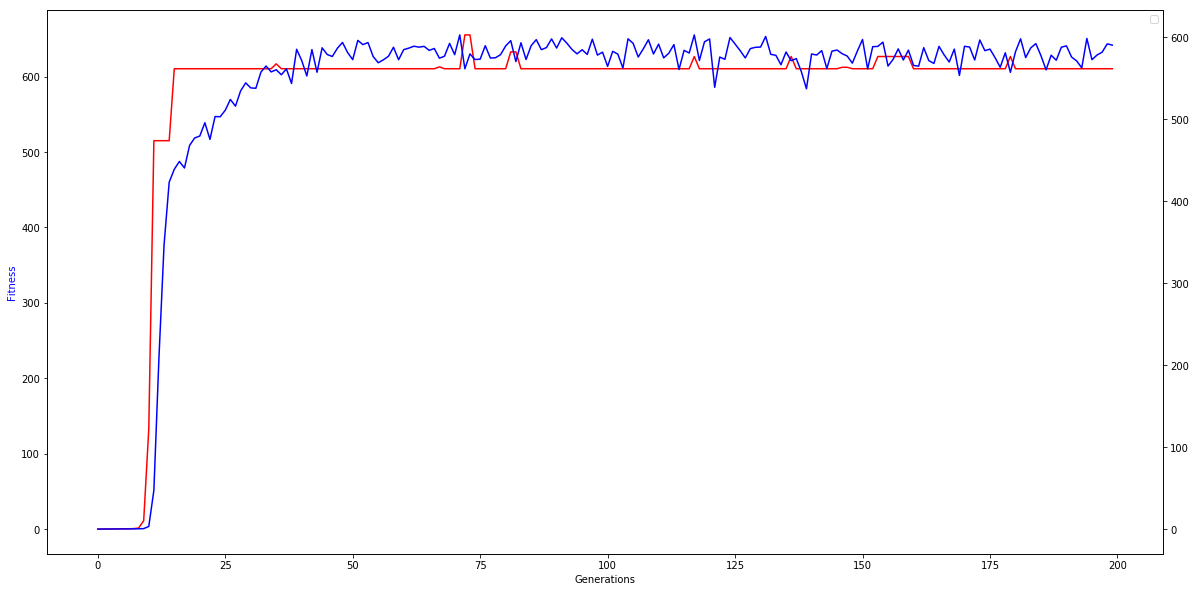

In [21]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
line1 = ax1.plot(gen, Max, "r-")
ax1.legend()
ax2 = ax1.twinx()
line2 = ax2.plot(gen, avg, "b-")

ax1.set_xlabel("Generations")
ax1.set_ylabel("Fitness", color="b")

plt.show()

In [19]:
evaluates = [fitness_info(p) for p in pop]
evaluates


[(610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (642.5458686547294, 32, 10),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (647.4541772502371, 33, 10),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (610.353058654332, 30, 9),
 (530.2208328851359, 26, 8),
 (610.353058654

In [28]:
#reading from the CSV file
import csv
items = {}
i = 0
with open('KP_50_30.csv ', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        items[i] = (int(row['weight']), float(row['profit']))
        i+=1
print(items)

{0: (3, 70.21492310376361), 1: (1, 28.399698840910016), 2: (1, 35.33844553039964), 3: (10, 89.94458498742748), 4: (9, 27.47186630391798), 5: (1, 72.68667344389279), 6: (5, 87.19466706284464), 7: (9, 92.08347592733178), 8: (2, 12.60163522020843), 9: (5, 50.77035537546087), 10: (4, 70.39624270866331), 11: (7, 85.07791563457316), 12: (9, 73.19475030022171), 13: (7, 39.49790927114003), 14: (2, 59.016923066474355), 15: (8, 83.73102056324315), 16: (4, 10.573883661642514), 17: (1, 74.47360663582818), 18: (4, 52.88279089458423), 19: (2, 74.09994946465628), 20: (2, 66.05683930682895), 21: (5, 71.3250280659016), 22: (7, 24.384297396313116), 23: (7, 53.12376321602865), 24: (9, 74.62860702354503), 25: (9, 64.29068926656728), 26: (1, 65.83981511701768), 27: (1, 78.99830526658455), 28: (2, 62.576856502881604), 29: (3, 73.42748287115934), 30: (1, 1.4994147517763734), 31: (4, 33.32573003634496), 32: (10, 74.5087098131479), 33: (3, 98.68190506717627), 34: (3, 66.1894744722987), 35: (8, 50.8832949912281

In [29]:
pop, logbook = GA_ALG(0.5,0.05,200,100,stats)
gen, avg, std, Min, Max = logbook.select('gen','avg','std','min','max')

No handles with labels found to put in legend.


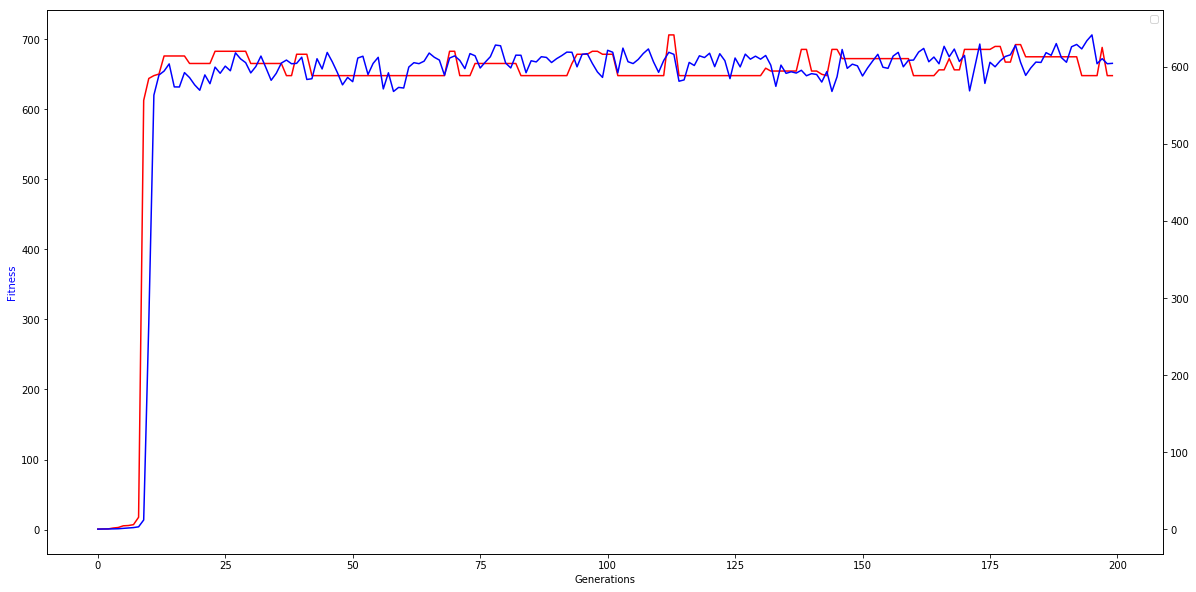

In [30]:
fig, ax1 = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
line1 = ax1.plot(gen, Max, "r-")
ax1.legend()
ax2 = ax1.twinx()
line2 = ax2.plot(gen, avg, "b-")

ax1.set_xlabel("Generations")
ax1.set_ylabel("Fitness", color="b")

plt.show()

In [31]:
#reading from the CSV file
import csv
items = {}
i = 0
with open('KP_70_30.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        items[i] = (int(row['weight']), float(row['profit']))
        i+=1
print(items)

{0: (8, 8.78757937227922), 1: (6, 36.57233495805389), 2: (2, 18.189758181619318), 3: (8, 80.89871754230002), 4: (5, 53.912958936152144), 5: (2, 20.455260179059763), 6: (8, 84.49637977835529), 7: (8, 80.34633897334787), 8: (3, 30.957265086231946), 9: (7, 35.63108675480884), 10: (3, 0.8703031736171152), 11: (9, 37.383305475732584), 12: (1, 92.23273096217794), 13: (3, 15.00660628852467), 14: (8, 71.01098121907809), 15: (4, 20.168983745689406), 16: (1, 38.117163109609585), 17: (7, 60.41297045154928), 18: (1, 3.6823973297686274), 19: (3, 20.53849764116199), 20: (4, 90.91864068215412), 21: (10, 8.59093888144673), 22: (5, 95.443742146153), 23: (5, 63.74108412497152), 24: (9, 42.182913495009664), 25: (8, 13.701278876187128), 26: (9, 64.23046863735257), 27: (8, 70.24716970301542), 28: (10, 85.06919304698789), 29: (7, 65.08163592031022), 30: (1, 41.45497126514833), 31: (2, 54.53050048675657), 32: (8, 25.971596367189964), 33: (2, 78.21303692185401), 34: (2, 87.94500448960542), 35: (6, 33.02960019

In [42]:
pop, logbook = GA_ALG(0.5,0.05,200,100,stats)
gen, avg, std, Min, Max = logbook.select('gen','avg','std','min','max')

No handles with labels found to put in legend.


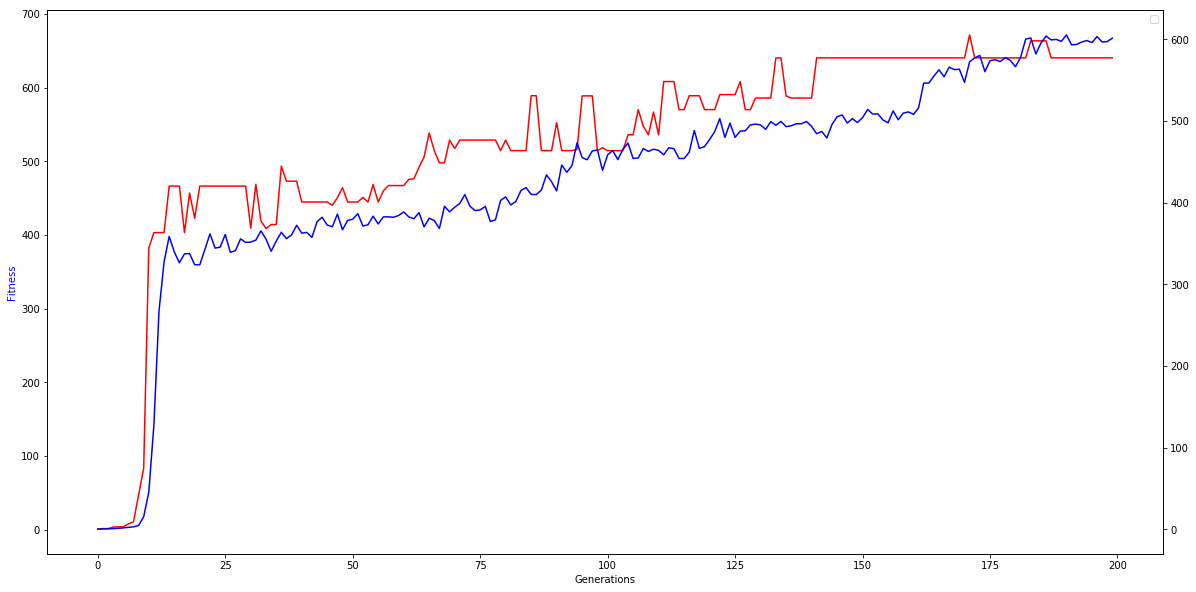

In [33]:
fig, ax1 = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
line1 = ax1.plot(gen, Max, "r-")
ax1.legend()
ax2 = ax1.twinx()
line2 = ax2.plot(gen, avg, "b-")

ax1.set_xlabel("Generations")
ax1.set_ylabel("Fitness", color="b")

plt.show()

In [34]:
#reading from the CSV file
import csv
items = {}
i = 0
with open('KP_90_40.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        items[i] = (int(row['weight']), float(row['profit']))
        i+=1
print(items)

{0: (3, 21.148586130309287), 1: (4, 39.76420658992967), 2: (1, 49.28969898219281), 3: (2, 99.93770352302454), 4: (8, 41.65517986628409), 5: (8, 47.34227921666117), 6: (1, 36.21586576718809), 7: (8, 58.78154928020024), 8: (10, 58.78526232038851), 9: (6, 77.9191368060647), 10: (1, 79.5466261736123), 11: (1, 10.460585577142002), 12: (8, 15.469672610395712), 13: (4, 32.62391193345685), 14: (10, 49.37686962298229), 15: (2, 22.740853000616767), 16: (2, 53.20599091710629), 17: (7, 34.4958373039065), 18: (9, 5.796833821061787), 19: (6, 56.26918134597136), 20: (10, 96.94868288779259), 21: (9, 96.16284056827796), 22: (8, 40.61072282270077), 23: (1, 38.269560442629846), 24: (4, 35.37872318816071), 25: (3, 16.435999681321245), 26: (9, 65.42519754069822), 27: (8, 47.05235213331734), 28: (1, 93.53372042806856), 29: (10, 1.1009697956730347), 30: (6, 15.689312369523712), 31: (9, 61.796084442355294), 32: (8, 61.48320943467813), 33: (6, 53.21500242039352), 34: (6, 57.97426405581155), 35: (7, 56.36698925

In [35]:
pop, logbook = GA_ALG(0.5,0.05,200,100,stats)
gen, avg, std, Min, Max = logbook.select('gen','avg','std','min','max')

No handles with labels found to put in legend.


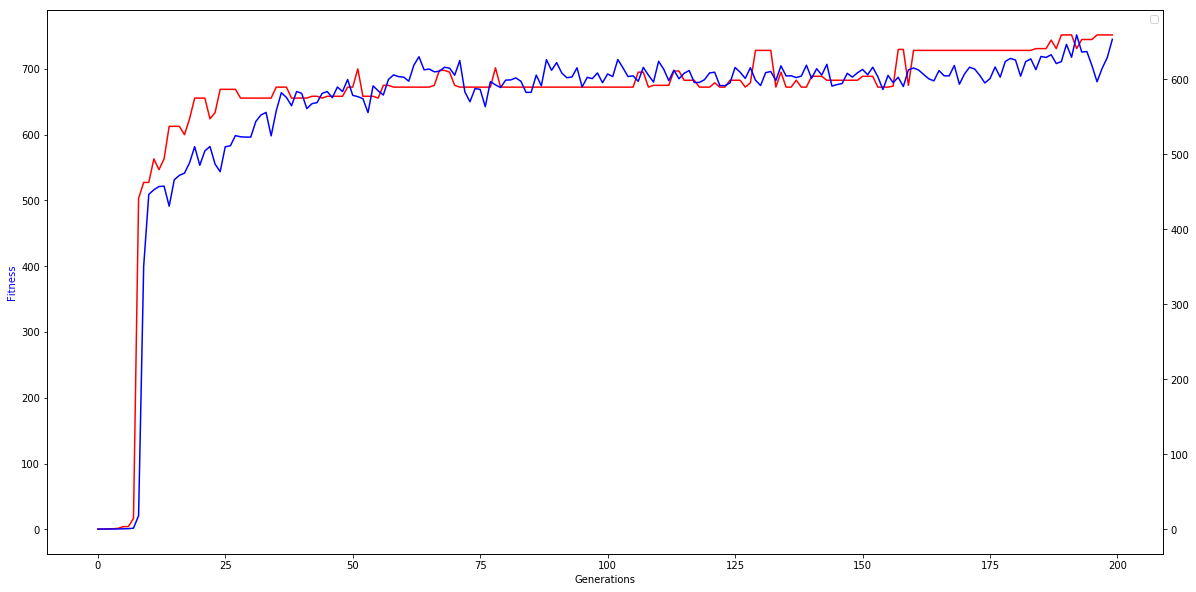

In [36]:
fig, ax1 = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
line1 = ax1.plot(gen, Max, "r-")
ax1.legend()
ax2 = ax1.twinx()
line2 = ax2.plot(gen, avg, "b-")

ax1.set_xlabel("Generations")
ax1.set_ylabel("Fitness", color="b")

plt.show()

In [40]:
_max =0.0
max_list=[]
for i in range(0,10):
    pop, logbook = GA_ALG(0.3,0.05,400,100,stats)
    evaluates=[fitness_info(p) for p in pop]
    
    ev_ok = [ev for ev in evaluates if ev[1]<=30]
    buf = max(ev_ok,key=lambda x: x[0])
    print(f'repeat:{i},value:{buf}')
    max_list.append(buf[0])
    if _max < buf[0]:
        _max = buf[0]
        
print(f'max:{_max}')
print(f'average: {sum(max_list)/len(max_list)}')

repeat:0,value:(644.6400041183288, 30, 13)
repeat:1,value:(721.3908383642671, 30, 14)
repeat:2,value:(722.9120024358739, 29, 12)
repeat:3,value:(575.333885015645, 30, 10)
repeat:4,value:(771.7865828628804, 30, 16)
repeat:5,value:(630.6180823712692, 30, 10)
repeat:6,value:(730.3061823764411, 30, 15)
repeat:7,value:(780.9115350053233, 30, 16)
repeat:8,value:(646.5947105268206, 30, 11)
repeat:9,value:(743.55783159219, 30, 13)
max:780.9115350053233
average: 696.8051654669041


In [ ]:
#conclution the average solution would be the best one to excute the fitness function with best generation compared with the max value it means when it getting lesser the best solution would the result approxmitly would be near for ther best solution